### Flight Price:

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_excel('flight_price.xlsx')

# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 10683 rows and 11 columns.



### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


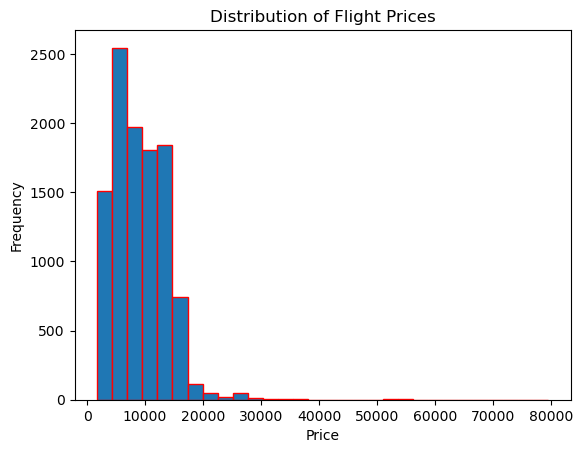

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('flight_price.xlsx')

# Assuming 'price' is the column containing flight prices
flight_prices = df['Price']

# Create a histogram
plt.hist(flight_prices, bins=30, edgecolor='red')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [5]:
import pandas as pd

df = pd.read_excel('flight_price.xlsx')
# Assuming 'price' is the column containing flight prices
flight_prices = df['Price']

# Find the minimum and maximum prices
min_price = flight_prices.min()
max_price = flight_prices.max()

# Calculate the range
price_range = max_price - min_price

print(f"The minimum price is {min_price}")
print(f"The maximum price is {max_price}")
print(f"The range of prices is {price_range}")


The minimum price is 1759
The maximum price is 79512
The range of prices is 77753



### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.


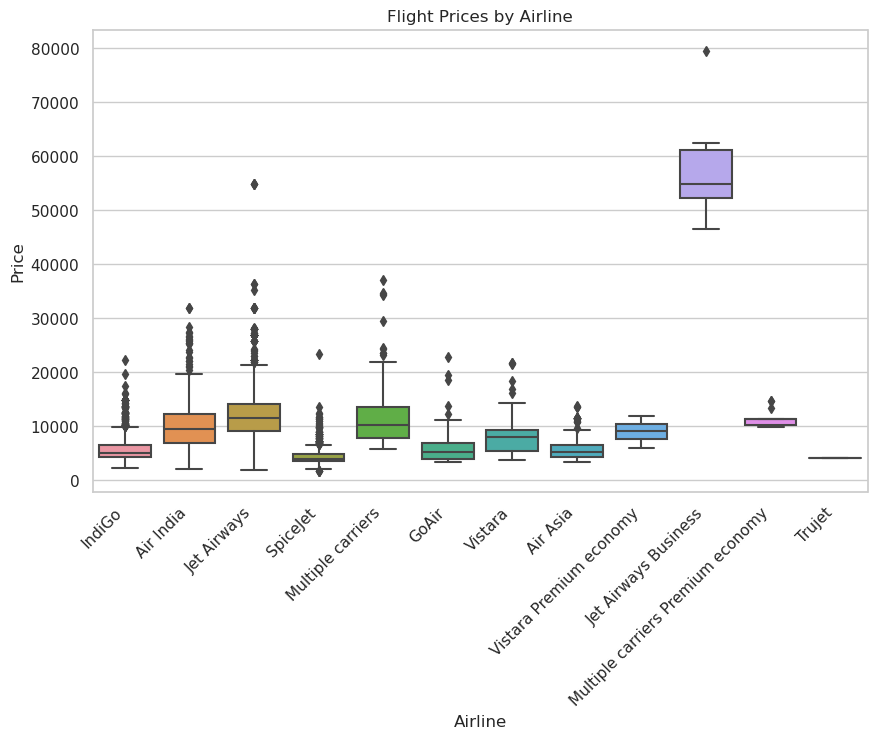

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('flight_price.xlsx')

# Assuming 'airline' is the column containing airline names, and 'price' is the column containing flight prices
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.


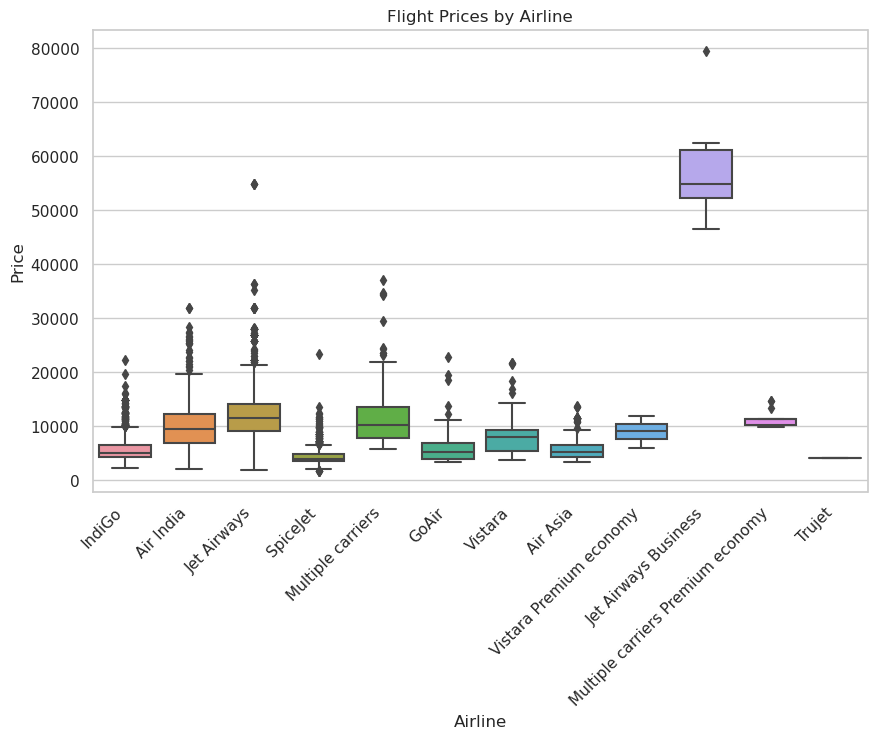

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'price' is the column containing flight prices
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


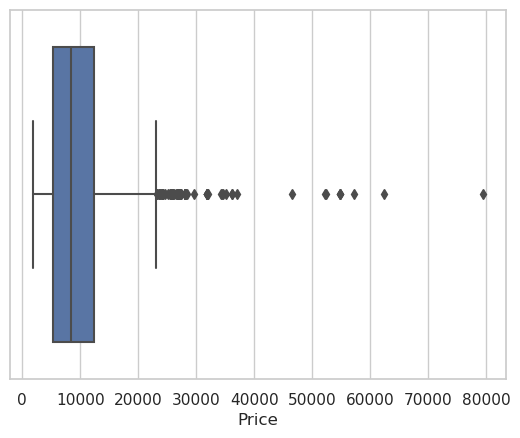

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'column_name' is the column for which you want to identify outliers
sns.boxplot(x=df['Price'])
plt.show()


In [9]:
from scipy import stats

z_scores = stats.zscore(df['Price'])
outliers = (abs(z_scores) > 3)


In [10]:
outliers

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Price, Length: 10683, dtype: bool

In [11]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

outliers1 = (df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 + 1.5 * IQR)


In [12]:
outliers1

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Price, Length: 10683, dtype: bool

#### Impact on Analysis:

##### 1. Influence on Descriptive Statistics:
- Outliers can have a substantial impact on summary statistics like the mean and standard deviation. If your dataset has extreme values, the mean may be skewed, and the standard deviation may be larger than expected.

##### 2. Effect on Machine Learning Models:
- Outliers can also affect machine learning models. Models like linear regression can be sensitive to outliers, potentially leading to inaccurate predictions.

##### 3. Data Quality and Anomalies:
- Outliers might indicate errors in the data or represent rare events. It's important to understand whether outliers are genuine data points or errors in data collection.

###### Before deciding on how to handle outliers, it's crucial to understand the nature of your data and the potential reasons for outliers. You might choose to remove them, transform the data, or apply other techniques based on your analysis goals and domain knowledge. Always consider the specific context of your dataset and the impact of outlier handling on the validity of your analysis.







### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?


#### To identify the peak travel season in the Flight Price dataset, you would want to analyze various features that could indicate increased demand for flights during specific times of the year. Here are some features you might consider:

#### 1. Date/Time Information:

- Analyze the flight prices based on months, weeks, or days of the week. Identify trends or patterns in pricing during different time periods.

In [16]:
# Assuming 'departure_date' is the column containing date information
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['month'] = df['Date_of_Journey'].dt.month


In [17]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3


#### 2. Holidays and Special Events:

- Check if there are any holidays or special events during certain periods. Peak travel seasons often coincide with holidays or events.

In [19]:
import pandas as pd

# Assuming 'Date_of_Journey' is the column containing date information
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# List of holiday or special event dates
holiday_dates = ['2022-12-25', '2023-01-01', '2023-07-04']  # Add more dates as needed

# Create a boolean column indicating whether it's a holiday or special event
df['is_holiday'] = df['Date_of_Journey'].isin(holiday_dates)


#### 3. Seasonality:

- Consider the seasons (spring, summer, fall, winter) and analyze how flight prices vary between seasons.

In [22]:
# Assuming 'departure_date' is the column containing date information
df['season'] = df['Date_of_Journey'].dt.month // 3


#### 4. Day of the Week:

- Analyze flight prices based on the day of the week. Weekends or specific weekdays might have different pricing patterns.

In [23]:
# Assuming 'departure_date' is the column containing date information
df['day_of_week'] = df['Date_of_Journey'].dt.dayofweek


##### Once you have extracted these features, you can analyze the average prices, price distribution, or any other relevant metrics for each category. You can use visualizations such as line plots, bar charts, or boxplots to present your findings.

- Here's a hypothetical example using a line plot to show how average prices vary across different months:

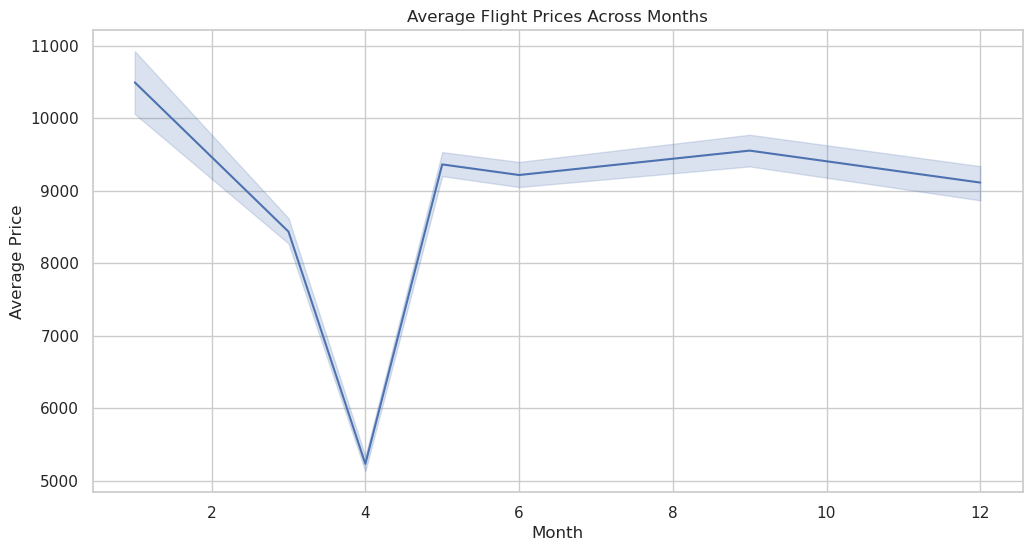

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Price', data=df)
plt.title('Average Flight Prices Across Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()


### 1. Date/Time Features:

- Analyze the distribution of flight prices over time. Look at the day of the week, month, and possibly even the time of day. Peak travel seasons might align with holidays, school breaks, or specific months.

### 2. Holidays and Events:

- Check if there are any holidays or special events during certain periods. People often travel more during holidays and events, affecting demand and prices.

### 3. Seasonality:

- Investigate if there is any seasonality in flight prices. Some destinations might have distinct peak seasons due to weather conditions, festivals, or cultural events.

### 4. Flight Route Analysis:

- Examine flight prices for specific routes. Different routes may have peak seasons at different times, depending on factors like climate, tourism patterns, or business events.

### 5. Historical Data:

- Consider historical data to identify patterns over multiple years. This helps in identifying recurring trends and understanding if there are any changes in peak seasons over time.

- Once you have analyzed these features, you can present your findings to your boss using visualizations and key  insights:

### 1. Visualizations:

- Use line charts or time series plots to illustrate the trend in flight prices over time.
- Create bar charts or heatmaps to highlight price variations across different months, days of the week, or times of the day.
- Display any spikes or patterns that coincide with holidays or special events.

### 2. Key Insights:

- Identify and communicate the periods with the highest and lowest flight prices.
- Highlight any significant trends or patterns that emerge from the analysis.
- Provide recommendations based on the findings, such as when to offer promotions or discounts, or when to expect increased demand.

### 3. Recommendations:

- Suggest strategies for the travel agency, such as adjusting pricing strategies, marketing efforts, or promotional campaigns during peak travel seasons.
- Consider proposing special travel packages or deals during off-peak seasons to attract customers.

##### In summary, a comprehensive analysis of date/time features, holidays, seasonality, flight routes, and historical data will provide valuable insights into identifying the peak travel season. Presenting these findings with clear visualizations and actionable recommendations will help your boss make informed decisions for the travel agency.


### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


#### To identify trends in flight prices in the Flight Price dataset, you can analyze various features that are likely to influence pricing. Here are some features you might consider and the corresponding visualizations to present your findings to your team:

### 1. Date/Time Features:

- Analyze how flight prices vary over time. Look at trends based on the day of the week, month, and season.
- Visualization: Time series line charts showing the average flight prices over different time intervals (days, months, seasons).

### 2. Route and Destination:

- Investigate how flight prices vary based on different routes and destinations. Some routes may have more stable pricing, while others might exhibit more variability.
- Visualization: Bar charts or boxplots showing the distribution of flight prices for different routes or destinations.

### 3. Advance Booking Period:

- Examine whether there's a correlation between the advance booking period and flight prices. Analyze if booking in advance leads to cost savings.
- Visualization: Scatter plot or line chart showing the relationship between the booking period and flight prices.

### 4. Airlines:

- Analyze how prices differ across different airlines. Some airlines may consistently offer lower or higher prices than others.
- Visualization: Boxplots or bar charts comparing average prices for different airlines.

### 5. Flight Class:

- Explore trends in prices based on the class of service (economy, business, first class).
- Visualization: Side-by-side boxplots or bar charts showing the distribution of prices for each class.

### 6. Special Events or Holidays:

- Check if flight prices spike during special events or holidays. People may be willing to pay more during peak travel periods.
- Visualization: Line chart or bar chart highlighting periods with increased flight prices during events or holidays.

### 7. Promotional Periods:

- Investigate whether there are trends associated with promotional periods or sales.
- Visualization: Time series charts showing the impact of promotional periods on flight prices.

### 8. Seasonality:

- Explore if there are seasonal patterns in flight prices, such as lower prices during off-peak seasons.
- Visualization: Line chart or heatmap illustrating seasonal variations in flight prices.

### 9. Correlation Analysis:

- Perform correlation analysis to identify relationships between various features and flight prices.
- Visualization: Heatmap displaying correlation coefficients between features and flight prices.

###### When presenting your findings to your team, consider creating a comprehensive report that includes visualizations, key insights, and actionable recommendations. Use clear and intuitive visualizations to communicate trends effectively and support your recommendations for optimizing pricing strategies, marketing efforts, and user experience on the flight booking website.


### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?


##### As a data scientist working for an airline company, you would aim to identify the factors that significantly affect flight prices. Here are key features to analyze, and suggestions on how to present your findings to the management team:

### 1. Route and Destination:

- Analyze how flight prices vary based on different routes and destinations.
- Presentation: Present a route-wise analysis with visuals, showing how prices vary for popular destinations.

### 2. Time and Date Features:

- Explore how flight prices change based on the day of the week, month, and season.
- Presentation: Use time series charts to illustrate the variation in prices over different time periods.

### 3. Advance Booking Period:

- Investigate whether there's a correlation between the advance booking period and flight prices.
- Presentation: Display a scatter plot or line chart illustrating how the lead time affects prices.

### 4. Flight Class:

- Analyze the impact of different flight classes (economy, business, first class) on prices.
- Presentation: Create visualizations like boxplots or bar charts to compare price distributions across classes.

### 5. Airlines:

- Explore how prices differ across different airlines.
- Presentation: Utilize visualizations such as boxplots or bar charts to compare average prices for each airline.

### 6. Special Events or Holidays:

- Investigate whether flight prices are influenced by special events or holidays.
- Presentation: Use line charts or bar charts to highlight periods with increased or decreased prices during events or holidays.

### 7. Seasonality:

- Analyze if there are seasonal patterns in flight prices.
- Presentation: Present seasonal variations using line charts or heatmaps to show trends over different seasons.

### 8. Promotions and Discounts:

- Examine the impact of promotions and discounts on flight prices.
- Presentation: Showcase the effects of promotional periods with visualizations, demonstrating how prices change during these events.

### 9. Flight Duration and Stops:

- Explore the relationship between flight duration, number of stops, and prices.
- Presentation: Use scatter plots or correlation matrices to illustrate the connections between these factors.

### 10. Correlation Analysis:

- Conduct a correlation analysis to identify relationships between various features and flight prices.
- Presentation: Present a correlation matrix and use visuals like heatmaps to highlight significant correlations.

#### When presenting your findings to the management team:

- Use Visualizations: Visuals are powerful tools for conveying information. Create clear and concise visualizations that highlight trends and patterns in the data.

- Key Insights: Summarize key findings and insights. Highlight the most important factors influencing flight prices.

- Recommendations: Provide actionable recommendations based on your analysis. This might include suggestions for pricing strategies, marketing efforts, and operational improvements.

- Interactive Dashboards: Consider building interactive dashboards that allow management to explore the data and insights interactively.

- Clear Communication: Clearly communicate your methods, assumptions, and limitations. Ensure that your presentation is accessible to non-technical stakeholders.

###### By presenting a comprehensive analysis with actionable insights, you can help the management team make informed decisions to optimize pricing strategies and improve overall business performance.

### Google Playstore:


### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?


In [27]:
df1=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df1.head()
# Get the number of rows and columns
num_rows, num_columns = df1.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 10841 rows and 13 columns.


In [28]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.


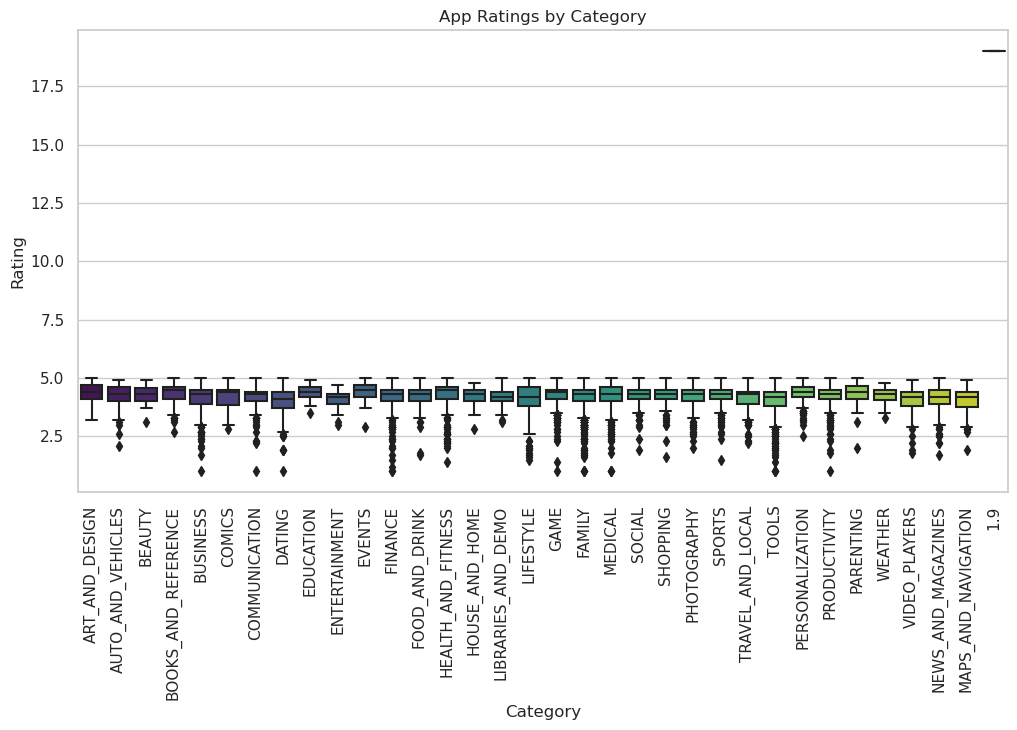

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Assuming 'Category' is the column containing app categories, and 'Rating' is the column containing app ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=df1, palette='viridis')
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()



### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.


In [31]:
# Check for missing values
missing_values = df1.isnull().sum()

# Display the columns with missing values (if any)
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


##### This code will output the number of missing values for each column in the dataset. If there are missing values, it will print the columns along with the respective count of missing values.

##### The impact of missing values on your analysis can vary depending on the extent and pattern of missingness:

1. Data Completeness: Missing values reduce the completeness of your dataset, potentially leading to biased or incomplete analyses.

2. Imputation: If missing values are prevalent, you might need to decide whether to impute (fill in) missing values or exclude incomplete records. Imputation methods can introduce uncertainty, so it's crucial to choose appropriate strategies based on the nature of the data.

3. Analysis Impact: Missing values can affect summary statistics, correlations, and machine learning models. It's important to consider how handling missing values may impact the validity of your results.

4. Bias in Results: If missing values are not handled appropriately, your analysis may be biased, leading to incorrect conclusions.

##### Before proceeding with any analysis, it's advisable to handle missing values appropriately based on your understanding of the data and the goals of your analysis. This may involve imputation, data exclusion, or other strategies depending on the context of your study. Always document how missing values were handled to ensure transparency in your analysis.


### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.


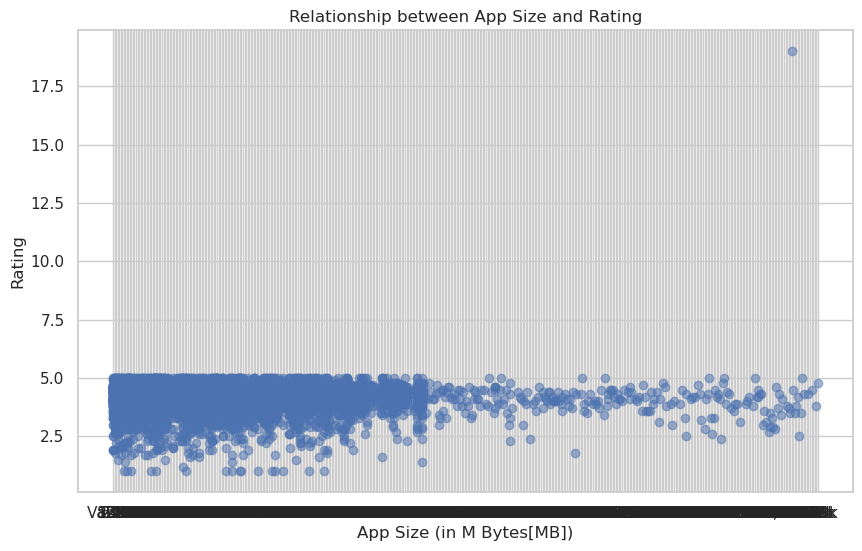

In [34]:
# Assuming 'Size' is the column containing app sizes, and 'Rating' is the column containing app ratings
plt.figure(figsize=(10, 6))
plt.scatter(df1['Size'], df1['Rating'], alpha=0.5)
plt.title('Relationship between App Size and Rating')
plt.xlabel('App Size (in M Bytes[MB])')
plt.ylabel('Rating')
plt.show()



### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


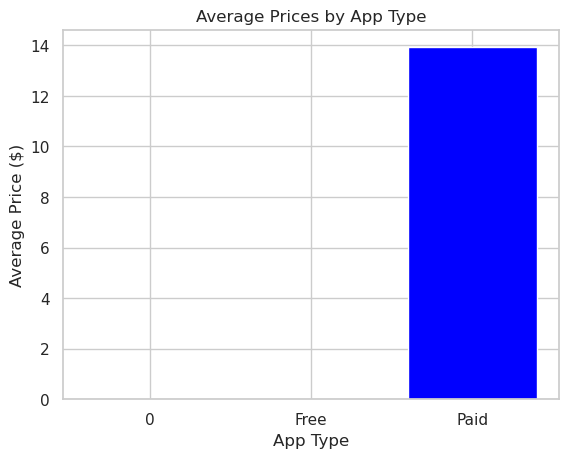

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Drop any rows with missing values in the 'Type' and 'Price' columns
df1 = df1.dropna(subset=['Type', 'Price'])

# Convert the 'Price' column to numeric, removing the dollar sign
df1['Price'] = df1['Price'].apply(lambda x: float(x[1:]) if x[0] == '$' else 0)

# Group by 'Type' and calculate the average price for each type
avg_prices = df1.groupby('Type')['Price'].mean()

# Plot the bar chart
plt.bar(avg_prices.index, avg_prices.values, color=['blue', 'green'])
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.title('Average Prices by App Type')
plt.show()


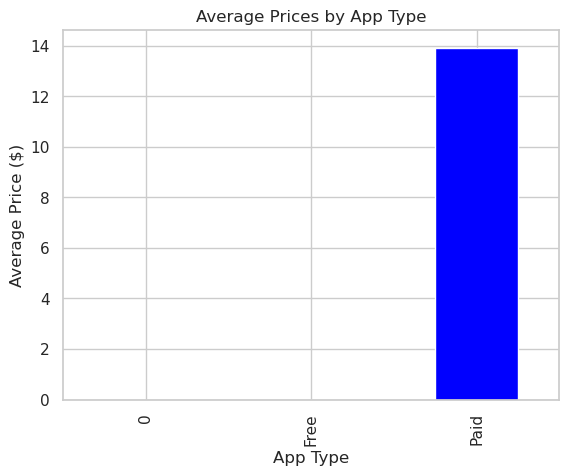

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Drop any rows with missing values in the 'Type' and 'Price' columns
df1 = df1.dropna(subset=['Type', 'Price'])

# Convert the 'Price' column to numeric, removing the dollar sign
df1['Price'] = df1['Price'].apply(lambda x: float(x[1:]) if '$' in x else 0)

# Group by 'Type' and calculate the average price for each type
avg_prices = df1.groupby('Type')['Price'].mean()

# Plot the bar chart
avg_prices.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.title('Average Prices by App Type')
plt.show()



### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.


In [40]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Function to convert installs to numeric
def convert_installs(value):
    try:
        return int(value.replace(',', '').replace('+', ''))
    except ValueError:
        return 0

# Clean the 'Installs' column and convert it to numeric
df1['Installs'] = df1['Installs'].apply(convert_installs)

# Sort the DataFrame based on the 'Installs' column in descending order
df1_sorted = df1.sort_values(by='Installs', ascending=False)

# Create a frequency table for the top 10 apps
top_10_apps = df1_sorted.head(10)[['App', 'Installs']]

# Display the frequency table
print(top_10_apps)


                                           App    Installs
3896                            Subway Surfers  1000000000
3943                                  Facebook  1000000000
335   Messenger – Text and Video Chat for Free  1000000000
3523                              Google Drive  1000000000
3565                              Google Drive  1000000000
2884                             Google Photos  1000000000
3665                                   YouTube  1000000000
2853                             Google Photos  1000000000
4234             Skype - free IM & video calls  1000000000
3687                   Google Play Movies & TV  1000000000



### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?


#### Analyzing the Google Playstore dataset to identify the most popular app categories involves considering various features that can provide insights into user preferences and market trends. Here's a step-by-step approach:

### 1. Explore and Clean the Data:

- Load the dataset and explore its structure, checking for missing values or inconsistencies.
- Handle missing values, duplicate entries, and any data quality issues.

### 1. Understand the 'Installs' and 'Rating' Distribution:

- Analyze the distribution of the 'Installs' and 'Rating' columns to understand the popularity and user satisfaction levels.
- Identify the categories with a high average number of installs.

### 1. Examine App Categories:

- Explore the unique app categories in the dataset.
- Calculate the average number of installs, ratings, and reviews for each category.

### 1. Popular Genres within Categories:

- Analyze sub-genres or genres within each category to understand more specific user preferences.
- Calculate average installs and ratings for these sub-genres.

### 1. Consider Price and Revenue:

- Analyze the impact of pricing on app popularity. Identify whether free or paid apps are more popular within specific categories.
- Calculate potential revenue by multiplying the number of installs by the app price.

### 1. User Reviews and Sentiment Analysis:

- Analyze user reviews for sentiment and identify patterns. Positive reviews can indicate user satisfaction and popularity.
- Consider the number of reviews as well, as it reflects user engagement.

### 1. Update Frequency:

- Check how frequently apps in each category are updated. Frequent updates may indicate active development and responsiveness to user feedback.

### 1. Demographic Considerations:

- Consider the target audience for each category. Some categories may be more popular among specific age groups or demographics.

### 1. Competition Analysis:

- Analyze the competition within each category. Consider the number of apps and their quality.
- Identify categories with high demand and less competition.

### 1. Correlation Analysis:

- Examine correlations between different features (e.g., installs, ratings, reviews) to identify patterns and relationships.

### 1. Visualization:

- Use visualizations such as bar charts, scatter plots, and heatmaps to illustrate trends and relationships in the data.

##### By thoroughly analyzing these aspects, you can provide valuable insights to the company about the most popular app categories on the Google Playstore. Additionally, it would be beneficial to keep an eye on current market trends and emerging technologies to make informed recommendations for the new app launch.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

df["Reviews"].str.isnumeric().sum()
df[~df["Reviews"].str.isnumeric()]

df_copy = df.copy()
df_copy=df_copy.drop(df_copy.index[10472])
df_copy[~df_copy["Reviews"].str.isnumeric()]

df_copy["Reviews"]=df_copy["Reviews"].astype("int")

df_copy["Size"]=df_copy["Size"].str.replace("M","000")
df_copy["Size"]=df_copy["Size"].str.replace("k","")
df_copy["Size"]=df_copy["Size"].replace("Varies with device",np.nan)
df_copy["Size"]=df_copy["Size"].astype(float)

chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs","Price"]
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,"")

        
df_copy["Installs"]=df_copy["Installs"].astype("int")
df_copy["Price"]=df_copy["Price"].astype(float)

df_copy["Last Updated"]=pd.to_datetime(df_copy["Last Updated"])
df_copy["Day"]=df_copy["Last Updated"].dt.day
df_copy["Month"]=df_copy["Last Updated"].dt.month
df_copy["Year"]=df_copy["Last Updated"].dt.year



In [47]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


#### Category Distribution:
- Visualize the distribution of app categories using a bar plot.

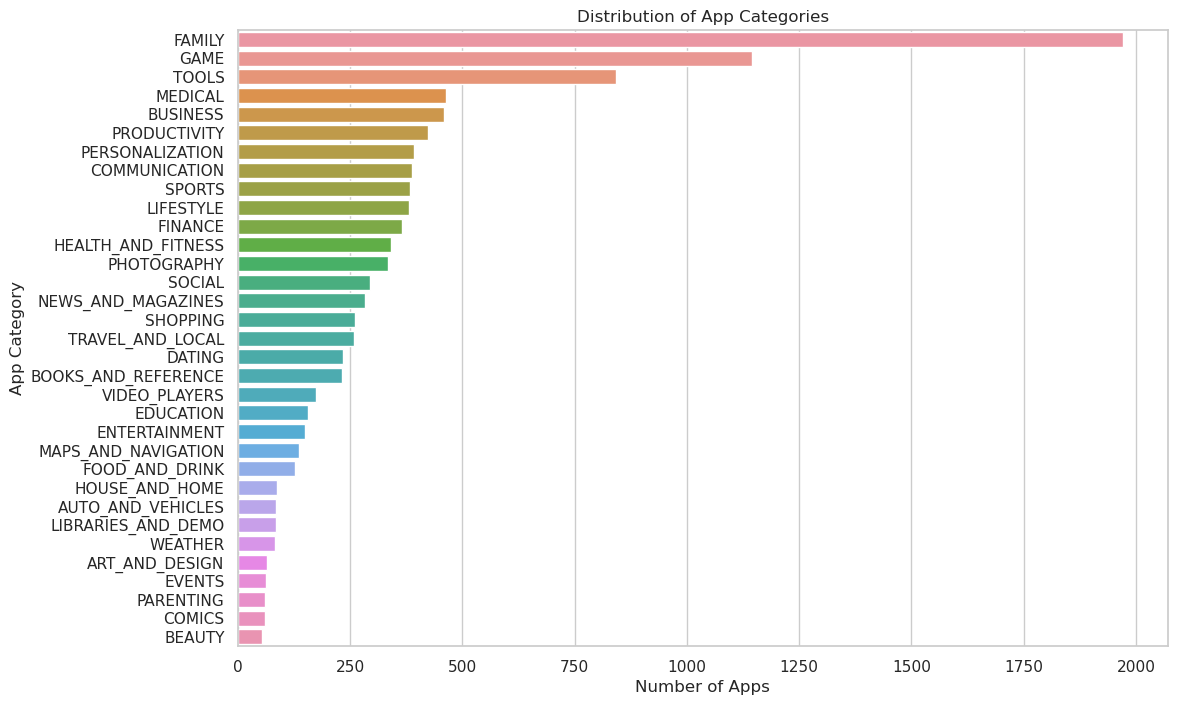

In [48]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df_copy, order=df_copy['Category'].value_counts().index)
plt.title('Distribution of App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('App Category')
plt.show()


#### Rating Distribution:
- Analyze the distribution of app ratings.

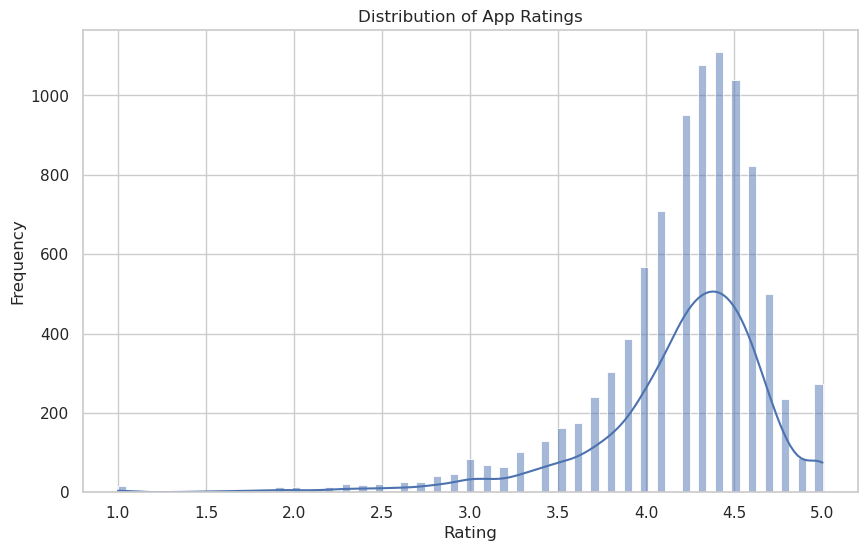

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['Rating'].dropna(), kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### Popular Apps by Installs:
- Identify the most installed apps and visualize their distribution.

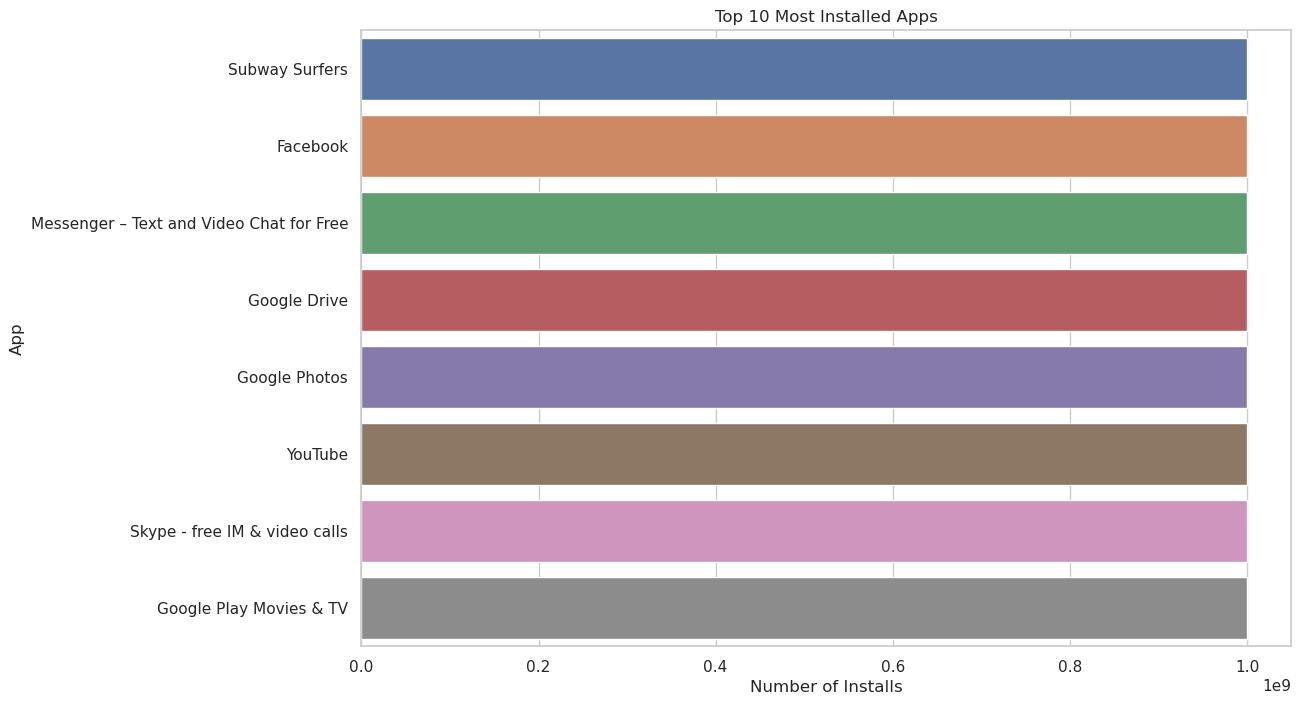

In [50]:
top_installed_apps = df_copy.sort_values(by='Installs', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Installs', y='App', data=top_installed_apps)
plt.title('Top 10 Most Installed Apps')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.show()


#### Correlation Heatmap:
- Explore correlations between numerical features.

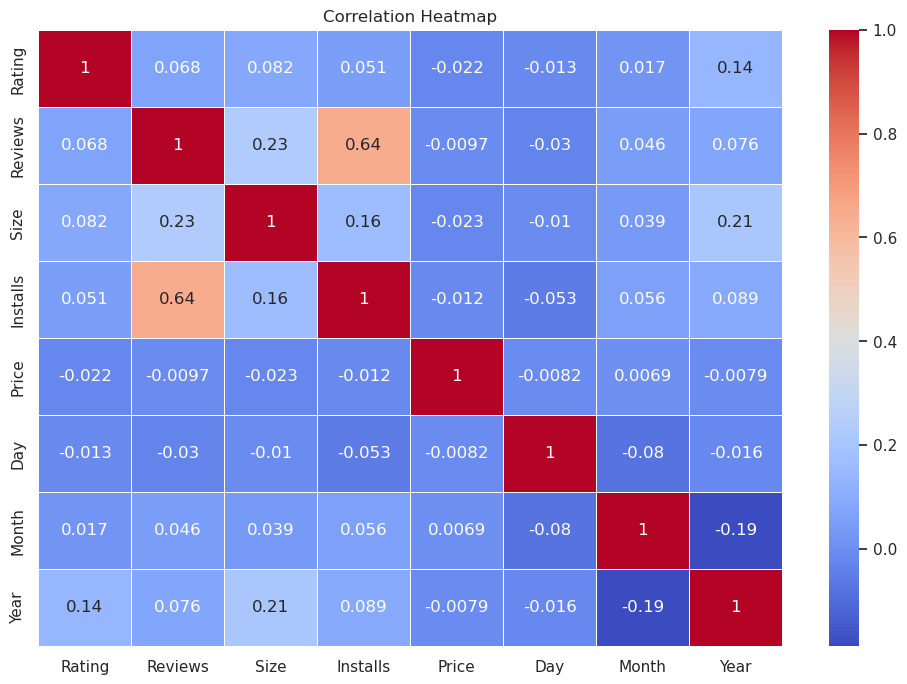

In [51]:
correlation_matrix = df_copy.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


#### App Sizes vs. Ratings:
- Analyze if there's any correlation between app size and ratings.

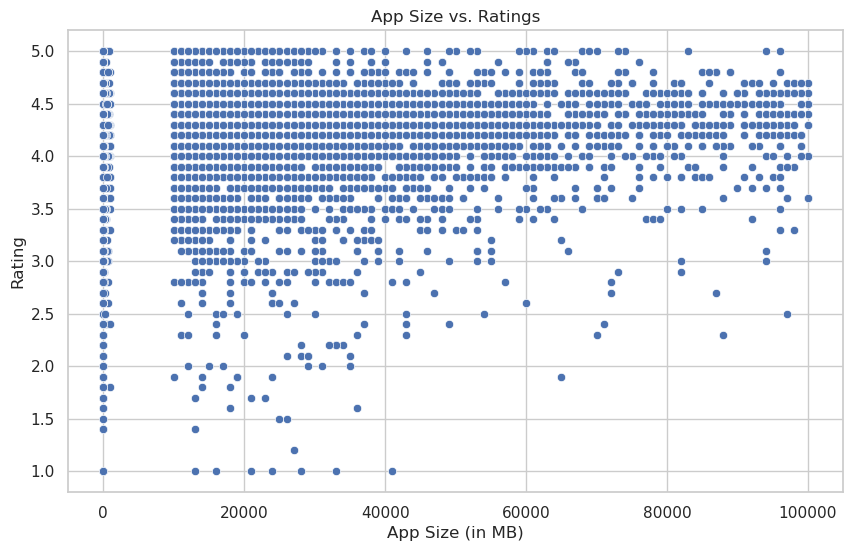

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df_copy)
plt.title('App Size vs. Ratings')
plt.xlabel('App Size (in MB)')
plt.ylabel('Rating')
plt.show()
